In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

In [2]:
cwd = os.getcwd()

path = cwd + "\ACC"

print(path)

os.chdir(path)

c:\Users\Admin\.vscode\PyTorch\Fall Dectection\ACC


In [41]:
#gets data from file specified by file_path
def get_contents(file_path):
    
    time = []
    x = []
    y = []
    z = []
    
    for file in os.listdir():
        if file.endswith(".npy"):
            file_path = f"{path}\{file}"
            data = np.load(file_path)

            time = data[0]
            x = data[1]
            y = data[2]
            z = data[3]
                
    df = pd.DataFrame({
        'time' : time,
        'x': x,
        'y': y,
        'z': z,
    })
    
    return df

In [44]:
dataset = get_contents(path)

dataset

,time,x,y,z
0,0.000000,-0.064713,-0.646271,-0.752502
1,0.010004,-0.064392,-0.643539,-0.749786
2,0.020007,-0.061966,-0.640366,-0.747437
3,0.030011,-0.062546,-0.640198,-0.747208
4,0.040014,-0.063202,-0.642395,-0.750626
...,...,...,...,...
3342,33.432024,0.062408,-0.774460,-0.646454
3343,33.442028,0.063034,-0.792053,-0.620148
3344,33.452031,0.067627,-0.804214,-0.597229
3345,33.462035,0.080795,-0.808044,-0.589447


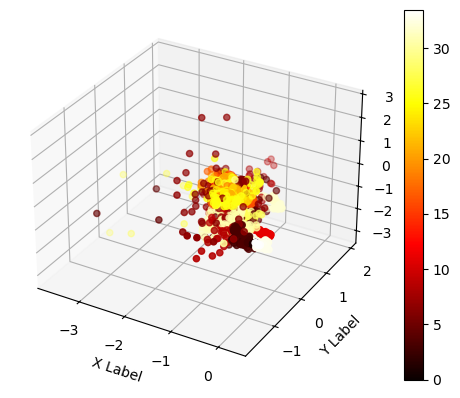

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

img = ax.scatter(dataset['x'], dataset['y'], dataset['z'], c = dataset['time'], cmap = plt.hot())
fig.colorbar(img)
plt.show()

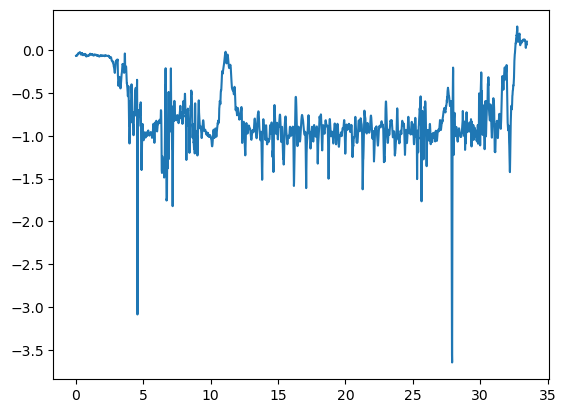

In [56]:
plt.plot(dataset['time'], dataset['x'])

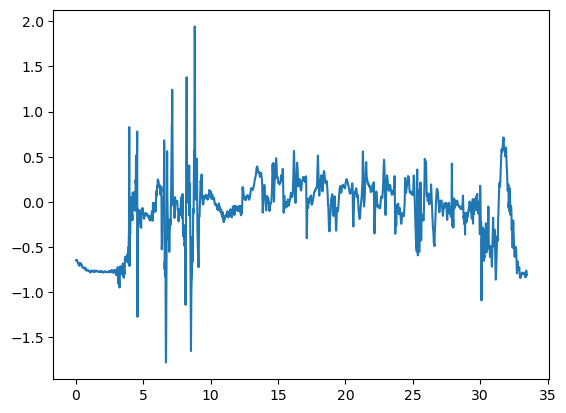

In [46]:
plt.plot(dataset['time'], dataset['y'])

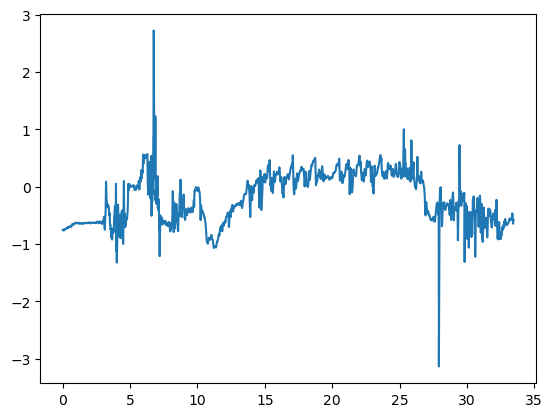

In [47]:
plt.plot(dataset['time'], dataset['z'])